# Visualize Drug Similarity

In this notebook, we try to visualize drug-drug similarity and to show correlates.

In [1]:
from util import *

## Basic UMAP

In [2]:
df, df_info = get_processed_data(drugs_as_features=False, impute=True)

First, let's see a basic UMAP plot of all the drugs.

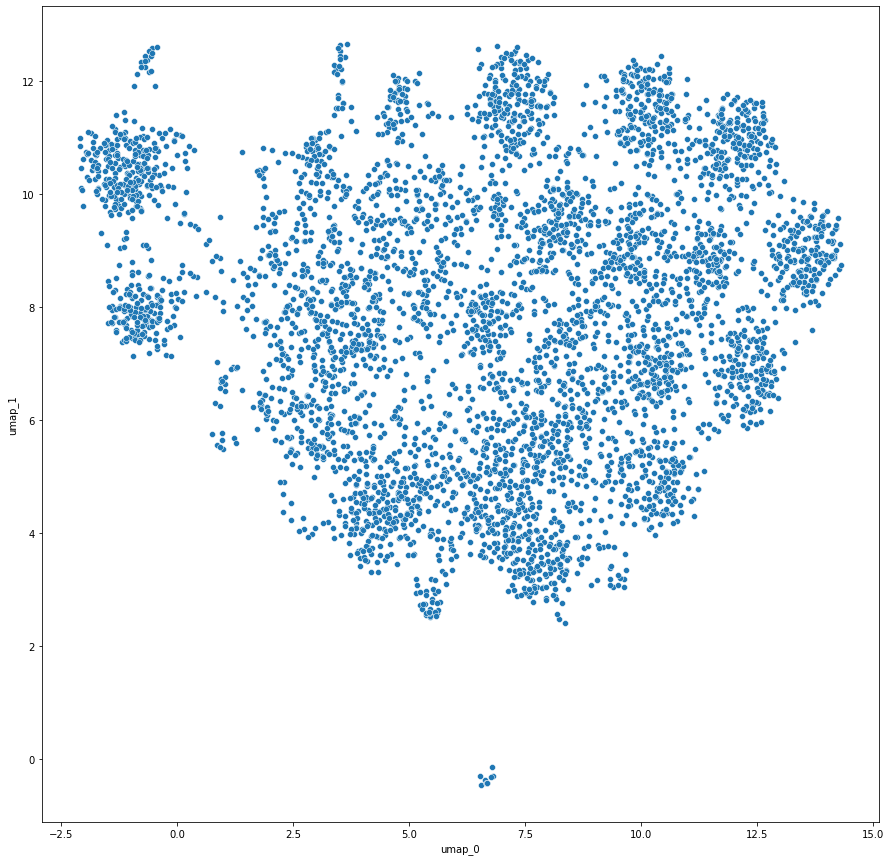

In [3]:
df_umap = run_umap(df)
draw_umap(df_umap)

## MOA-Colored UMAP

Now let's try coloring the UMAP by some relevant MOAs. Coloring by all MOAs won't be helpful since many of the MOAs
are not cancer related.

In [4]:
df_moa = df.join(df_info[["moa"]], how="left")
df_moa.moa.fillna("Unknown", inplace=True)

For starters, let's try these 5 cancer-related MOAs.

In [5]:
some_cancer_moas = {"EGFR inhibitor", "PI3K inhibitor", "MEK inhibitor", "PARP inhibitor", "CDK inhibitor"}
df_moa.moa = df_moa.moa.apply(lambda moa: moa if moa in some_cancer_moas else "Other")

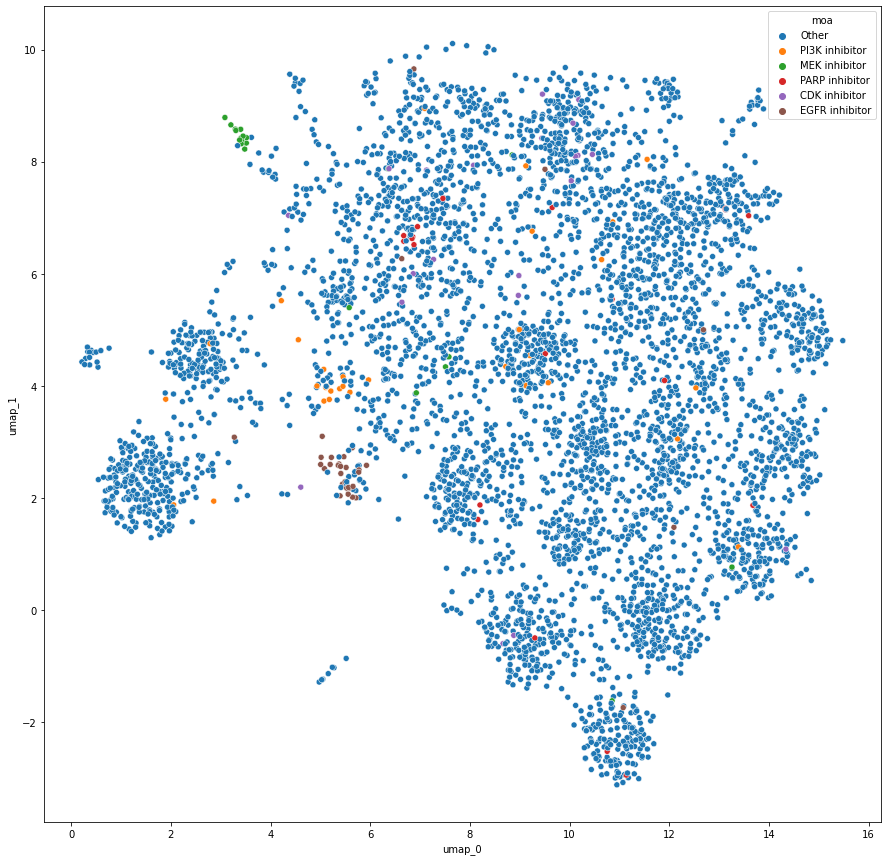

In [6]:
df_umap = run_umap(df_moa, extra_cols=["moa"])
draw_umap(df_umap, hue="moa")

That's interesting. PI3K, MEK and EGFR inhibitors group nicely.

Now let's try grabbing all drugs that are known to be cancer drugs, and using those to grab cancer-related MOAs.

In [7]:
df_moa = df.join(df_info[["moa"]], how="left")
disease_areas_series = df_info["disease.area"].str.split(",").dropna().explode()
oncology_drugs = set(disease_areas_series[disease_areas_series == "oncology"].index.unique())
print("Found {} drugs that are improved for indications in cancer".format(len(oncology_drugs)))

Found 103 drugs that are improved for indications in cancer


In [8]:
oncology_moas = set(df_moa[df_moa.index.isin(oncology_drugs)].moa.unique())
print("Found {} MOAs for those oncology drugs".format(len(oncology_moas)))

Found 50 MOAs for those oncology drugs


In [9]:
df_moa["moa_count"] = df_moa.groupby("moa")["moa"].transform("count")
df_moa = df_moa[(df_moa.moa.isin(oncology_moas)) & (df_moa.moa_count >= 10)]
df_moa.drop(columns=["moa_count"], inplace=True)

Now, re-run the whole UMAP on this small subset to get a different clustering and visualization.

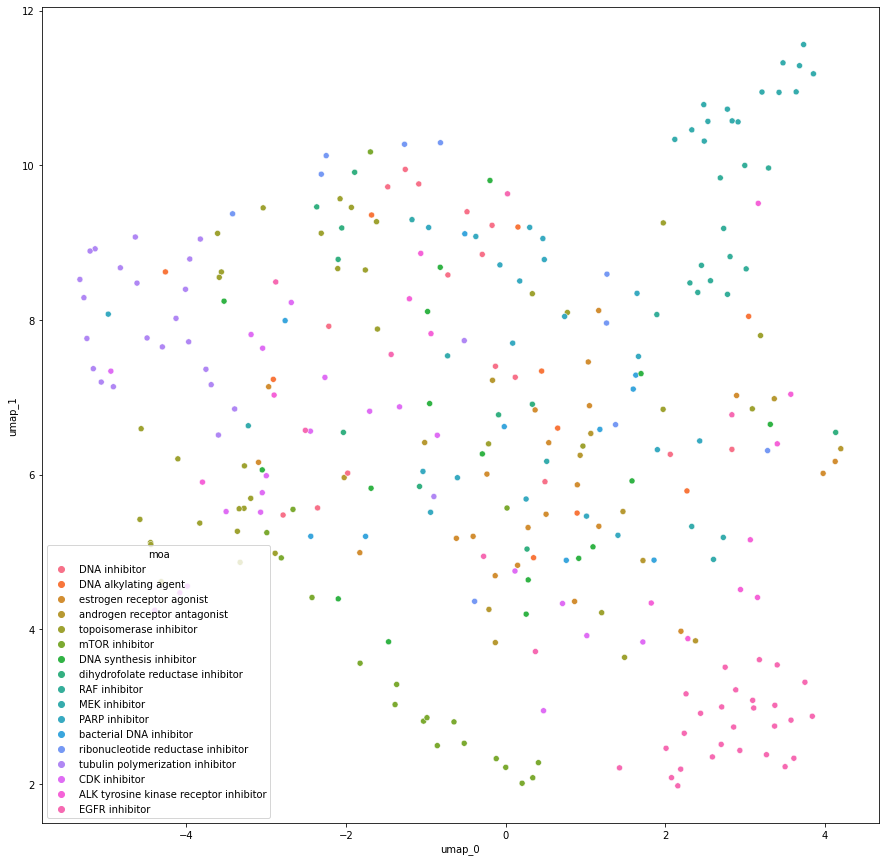

In [10]:
df_umap = run_umap(df_moa, extra_cols=["moa"])
draw_umap(df_umap, hue="moa")